In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/History%20of%20Conflicts/conflicts%20and%20wars%20-%20Sheet1.csv")

In [3]:
df.head()

,Date,Headline,Conflict Type,Country,Region,Description,Sources
0,3000 BC,God Punishes Man with Six-Day Storm,Weapon,Unknown,Western Asia,Ancient Sumerian legend recounts the deeds of ...,Hatami and Gleick 1994
1,2500 BC,Lagash-Umma border dispute,Weapon,Mesopotamia,Western Asia,The dispute over the Gu'edena (edge of paradis...,Hatami and Gleick 1994
2,1720-1684 BC,Tigris River dammed,Weapon,Mesopotamia,Western Asia,"A grandson of Hammurabi, Abish or Abi-Eshuh, d...",Hatami and Gleick 1994
3,circa 1300 BC,Kishon River flooded in defeat of Sisera,Weapon,Unknown,Western Asia,The Old Testament gives an account of the defe...,Scofield 1967
4,1200 BC,Moses parts the Red Sea,Weapon,Egypt,Northern Africa,When Moses and the retreating Jews find themse...,Hatami and Gleick 1994


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           927 non-null    object
 1   Headline       927 non-null    object
 2   Conflict Type  927 non-null    object
 3   Country        927 non-null    object
 4   Region         927 non-null    object
 5   Description    926 non-null    object
 6   Sources        927 non-null    object
dtypes: object(7)
memory usage: 50.8+ KB


In [5]:
df.isnull().sum()

Date             0
Headline         0
Conflict Type    0
Country          0
Region           0
Description      1
Sources          0
dtype: int64

In [6]:
df.describe()

,Date,Headline,Conflict Type,Country,Region,Description,Sources
count,927,927,927,927,927,926,927
unique,167,909,12,159,22,922,640
top,2017,Water tank is hit in an air raid in Yemen,Casualty,Yemen,Western Asia,A water project is bombed during an air raid i...,RAND Database of Worldwide Terrorism Incidents...
freq,87,3,442,136,305,2,79


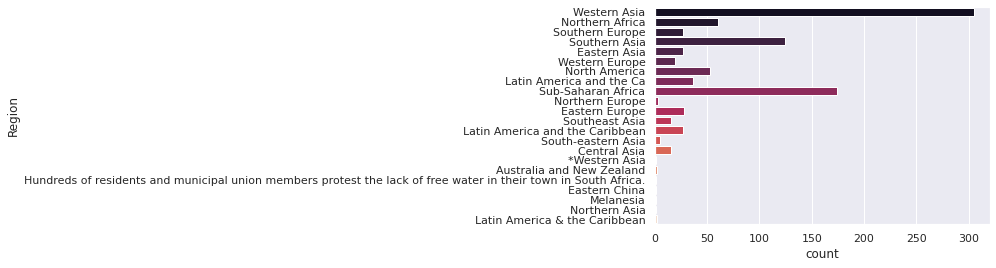

In [7]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(y='Region', data=df, palette='rocket')

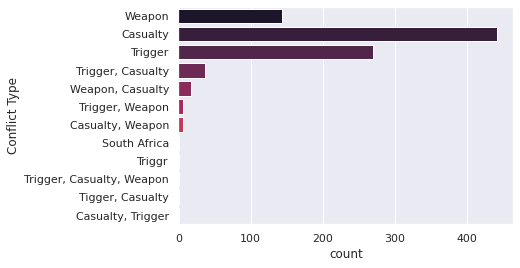

In [8]:
ax = sns.countplot(y='Conflict Type', data = df, palette='rocket')

In [9]:
df["Description"].describe()

count                                                   926
unique                                                  922
top       A water project is bombed during an air raid i...
freq                                                      2
Name: Description, dtype: object

In [10]:
df['Headline'].fillna('NULL',inplace = True)
df['Headline']=df['Headline'].astype(str)

In [11]:
df['Country'].value_counts()\
            .head(20)\
            .to_frame(name='count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues',subset=['count'])

,index,count
0,Yemen,136
1,Iraq,70
2,United States,45
3,India,42
4,Pakistan,32
5,Somalia,27
6,Colombia,23
7,Kenya,22
8,Syria,21
9,Afghanistan,21


In [12]:
df['Conflict Type'].value_counts()\
            .head(20)\
            .to_frame(name='count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues',subset=['count'])

,index,count
0,Casualty,442
1,Trigger,270
2,Weapon,144
3,"Trigger, Casualty",37
4,"Weapon, Casualty",17
5,"Trigger, Weapon",6
6,"Casualty, Weapon",6
7,South Africa,1
8,Triggr,1
9,"Trigger, Casualty, Weapon",1


In [13]:
df['Date'].value_counts()\
            .head(20)\
            .to_frame(name='count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues',subset=['count'])

,index,count
0,2017,87
1,2018,70
2,2016,61
3,2015,53
4,2012,51
5,2014,47
6,2002,32
7,2019,30
8,2006,28
9,1999,27


In [14]:
df['Region'].value_counts()\
            .head(20)\
            .to_frame(name='count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues',subset=['count'])

,index,count
0,Western Asia,305
1,Sub-Saharan Africa,174
2,Southern Asia,124
3,Northern Africa,60
4,North America,53
5,Latin America and the Ca,36
6,Eastern Europe,28
7,Latin America and the Caribbean,27
8,Southern Europe,27
9,Eastern Asia,27


In [15]:
df['Headline'].value_counts()\
            .head(20)\
            .to_frame(name='count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues',subset=['count'])

,index,count
0,Water tank is hit in an air raid in Yemen,3
1,Air raid hits water well in Yemen,3
2,Well is damaged in conflict in Yemen,2
3,Water project is bombed during air raid,2
4,Lesotho coup partly over water,2
5,Water tank is hit during air raids in Yemen,2
6,Water well is damaged by air raid in Yemen,2
7,Water well is hit during air raid in Yemen,2
8,Protests over water shortages turn violent,2
9,Water tanks are hit in air raids in Yemen,2


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


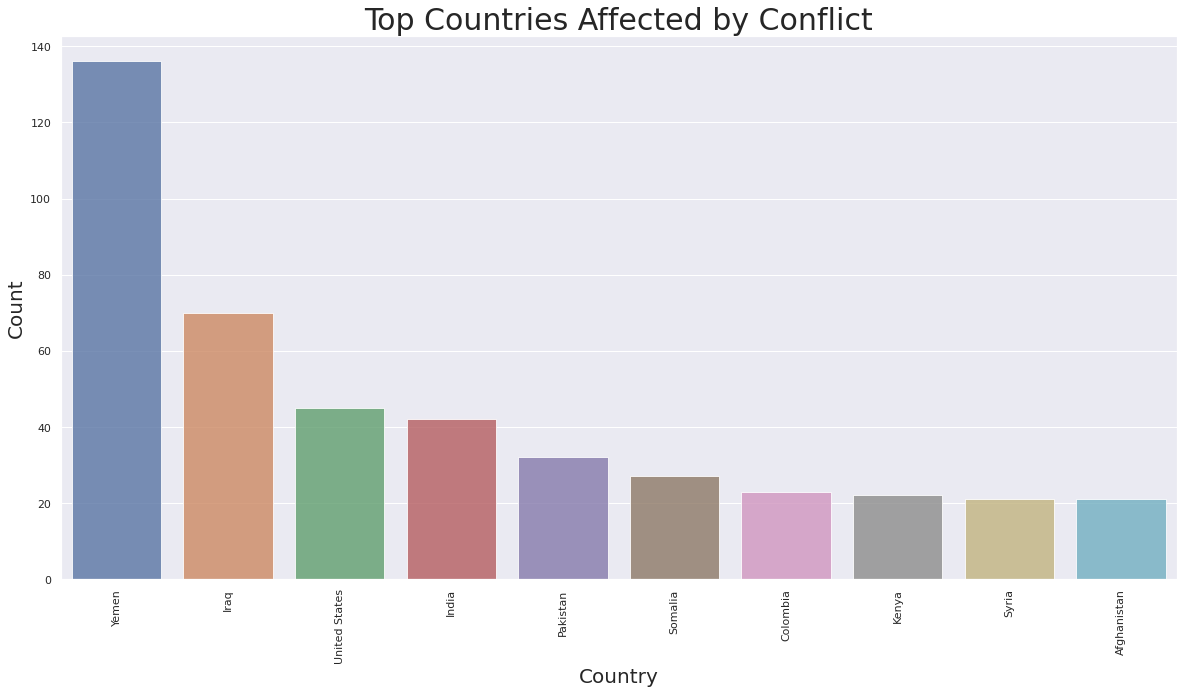

In [16]:
country_count = df['Country'].value_counts()
country_count = country_count[:10]
plt.figure(figsize = (20,10))
sns.barplot(country_count.index, country_count.values, alpha = 0.8)
plt.title('Top Countries Affected by Conflict', fontsize = 30)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


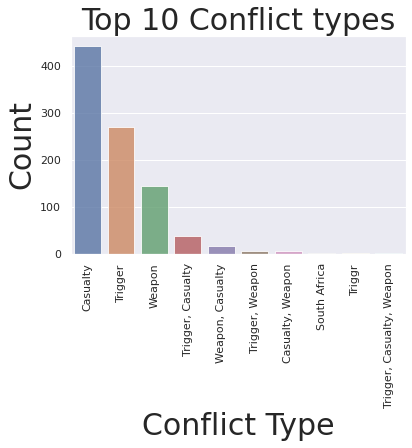

<Figure size 1440x1440 with 0 Axes>

In [17]:
type_count = df['Conflict Type'].value_counts()
type_count = type_count[:10]
sns.barplot(type_count.index, type_count.values, alpha=0.8)
plt.title('Top 10 Conflict types', fontsize = 30)
plt.xlabel('Conflict Type', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.xticks(rotation = 90)
plt.figure(figsize=(20,20))
plt.show()

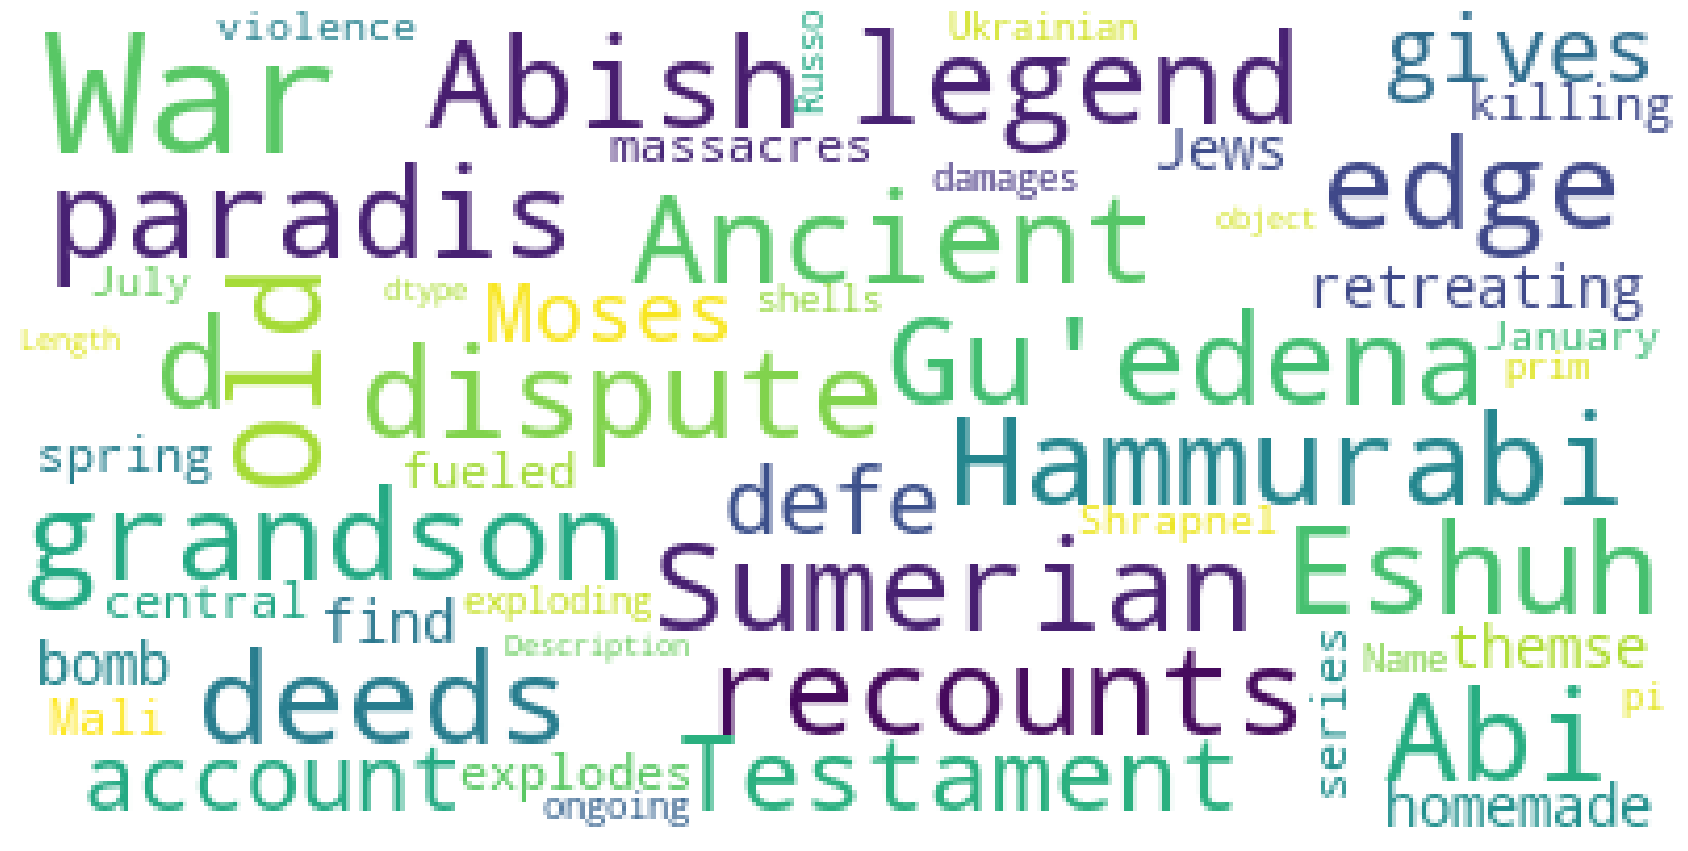

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import spacy
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                     stopwords = stopwords_set,
                     max_words = 300,
                     max_font_size = 40,
                     random_state = 42,
                     ).generate(str(df['Description']))

print(wordcloud)
plt.figure(figsize = (30,30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

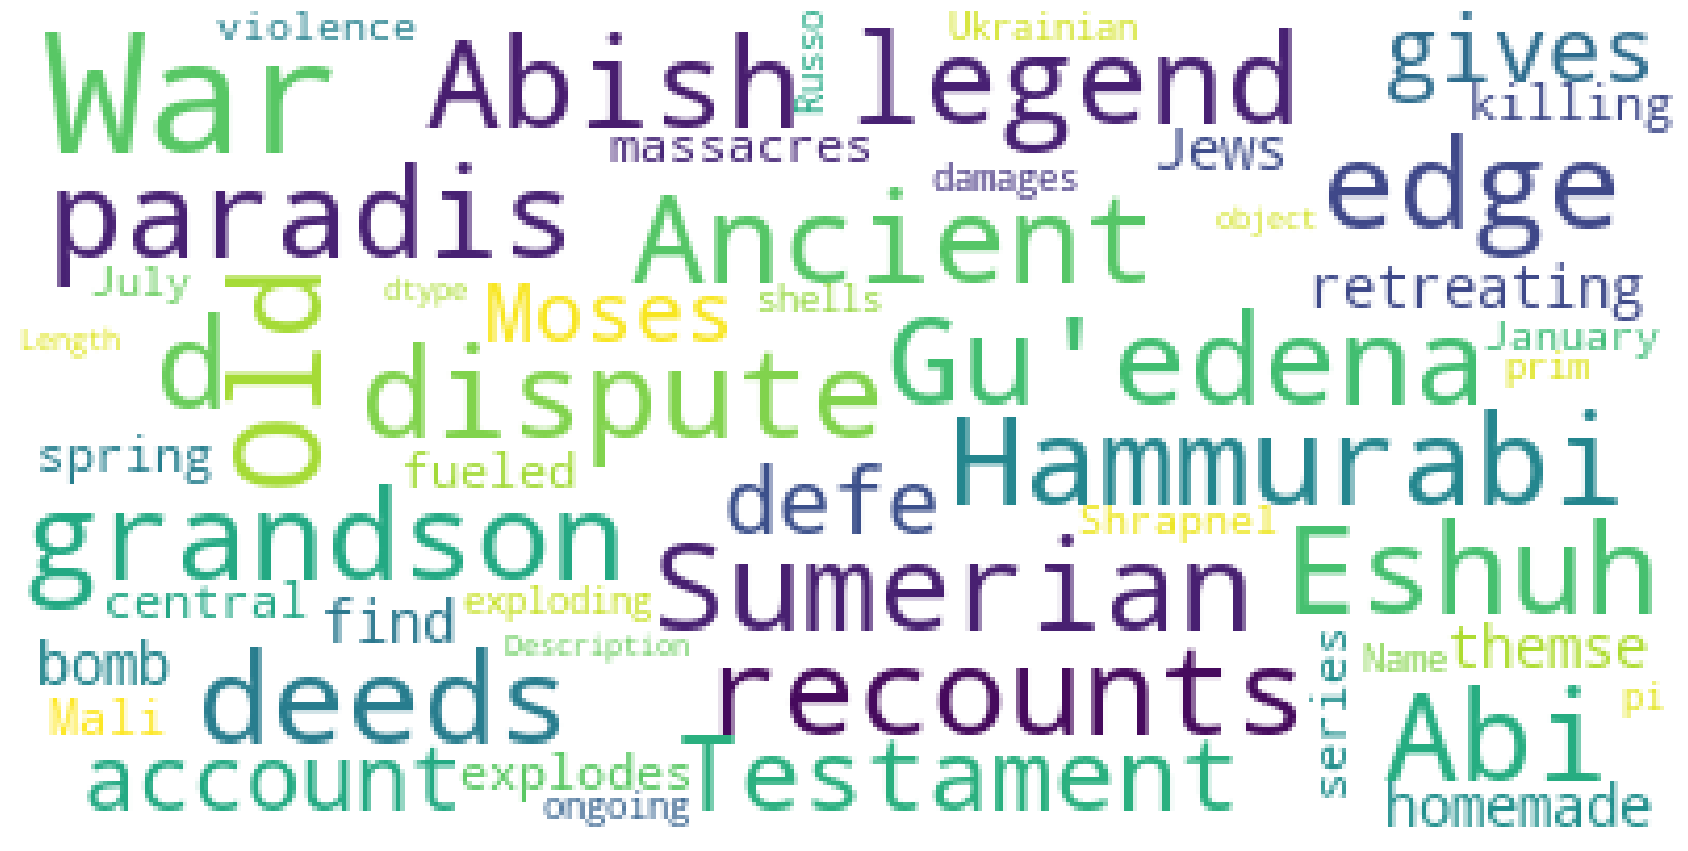

In [19]:
unique_words = df.drop_duplicates(subset=['Description'])
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                     stopwords = stopwords_set,
                     max_words = 300,
                     max_font_size = 40,
                     random_state = 42,
                     ).generate(str(unique_words['Description']))

print(wordcloud)
plt.figure(figsize=(30,30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()